In [1]:
import utilities
import glob
import matplotlib.pyplot as plt
import splitfolders #https://pypi.org/project/split-folders/

## Split data
#### The Plant Village dataset has around 61 thousand images, split into train, test and val datasets.

In [2]:
#Use the splitfolders packages to split into 80% train, 10% val, 10% test
# splitfolders.ratio("data_withaug/Plant_leave_diseases_dataset_with_augmentation", output="data_withaug/output", seed=1337, ratio=(.8, .1, .1), group_prefix=None) 


In [3]:
#create variables for the filepaths of the directories
train_dir = 'data_withaug/output/train'
val_dir = 'data_withaug/output/val'
test_dir = 'data_withaug/output/test'

#Use the get_file functions to get an idea of the number of images in the train, val, test folders.
train_samples =utilities.get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
val_samples = utilities.get_files(val_dir)
test_samples=utilities.get_files(test_dir) 
print(num_classes,"Classes")
print(train_samples,"Train images")
print(val_samples, "Validation images")
print(test_samples,"Test images")

39 Classes
49179 Train images
6139 Validation images
6168 Test images


### Create a csv file for visualizations in tableau

A bar graph was created to show the number of images for each class. Orange: Haunglongbing(Citrus Greening),
Tomato: Yellow leaf curl virus, and soybean:healthy had more images than the rest of the classes.

In [ ]:
#Use the get_dictionary function to get a csv with the labels and number of files 
#EDA was done in tableau with these files to check the distribution of the classes
utilities.get_dictionary(train_dir)
utilities.get_dictionary(val_dir)
utilities.get_dictionary(test_dir)

In [4]:
#List out the labels.
file_list = []
index = []
for i, file in enumerate(glob.glob(train_dir+'/*')):
    file_name = file.split('/')[3]
    file_list.append(file_name)
print(sorted(file_list))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl

In [5]:
#Use the get_dataframe function to input file name, disease id, and disease type in a dataframe.
train_data = utilities.get_dataframe(file_list, train_dir)
train_data

,File,Disease_id,Disease_Type
0,Strawberry___healthy/image (326).JPG,0,Strawberry___healthy
1,Strawberry___healthy/image (633).JPG,0,Strawberry___healthy
2,Strawberry___healthy/image (263).JPG,0,Strawberry___healthy
3,Strawberry___healthy/image (799).JPG,0,Strawberry___healthy
4,Strawberry___healthy/image (849).JPG,0,Strawberry___healthy
...,...,...,...
49174,Soybean___healthy/image (1650).JPG,38,Soybean___healthy
49175,Soybean___healthy/image (427).JPG,38,Soybean___healthy
49176,Soybean___healthy/image (4901).JPG,38,Soybean___healthy
49177,Soybean___healthy/image (974).JPG,38,Soybean___healthy


### Create an imagegrid to visualize crop and disease pairs

In [6]:
#A file list containing only the crop and disease pair.
file_list2 = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust',
              'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
              'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Grape___Black_rot',
              'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
              'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
              'Pepper,_bell___Bacterial_spot', 'Potato___Early_blight', 'Potato___Late_blight',
              'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot',
              'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
              'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
              'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus']

In [7]:
len(file_list2)

26

<ipython-input-8-d2ecb53c6468>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


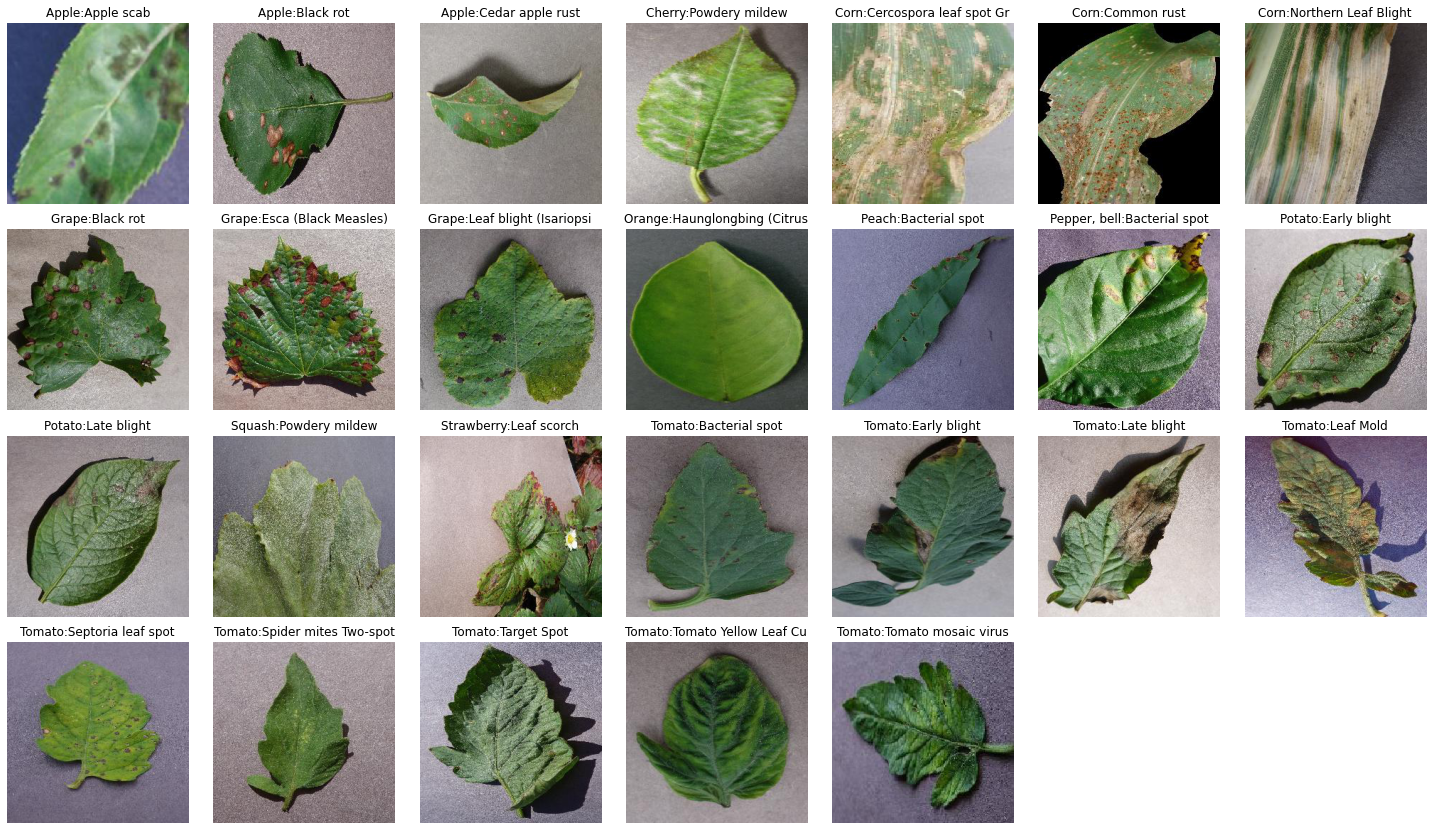

In [8]:
#Use the above file list ot create an image grid showing a random image of the class.
#Code borrowed and adapted from https://medium.com/analytics-vidhya/plants-doctor-detecting-diseases-in-plants-e5c44c569bdb
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1, figsize = (20,15))
grid = ImageGrid(fig, 111,
                 nrows_ncols = (4,7),
                 axes_pad = 0.35)

for i in range(28):
    ax = grid[i]
    ax.axis('off')
    if i < len(file_list2):
        class_name = file_list2[i]
        for filepath in train_data[train_data['Disease_Type'] == class_name]['File'].values[1:2]:
            img = utilities.read_img(filepath, (256,256))
            name = class_name[:30].replace('___',':').replace('_', ' ')
            ax.imshow(img/255.)
            ax.set_title(name, fontsize = 12, loc = 'center')
            #ax.annotate(class_name, xy=(10,25), color ='black',fontsize = 14, fontweight = 'bold')
plt.tight_layout()

In [ ]:
#Save the figure
ax.figure.savefig('image_grid.jpeg')